In [1]:
# 1️⃣ Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# For reproducibility
np.random.seed(42)

In [3]:
# -------------------------------
# 1️⃣ Simulate Order Book Data
# -------------------------------

dates = pd.date_range(start="2024-01-01", periods=100, freq="T")  # 1-min intervals
mid_prices = 100 + np.cumsum(np.random.normal(0, 0.05, size=len(dates)))  # random walk

# Simulate bid and ask around mid price
bid_prices = mid_prices - np.random.uniform(0.01, 0.05, size=len(dates))
ask_prices = mid_prices + np.random.uniform(0.01, 0.05, size=len(dates))

spread_df = pd.DataFrame({
    "Mid Price": mid_prices,
    "Bid Price": bid_prices,
    "Ask Price": ask_prices
}, index=dates)

spread_df.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15304\150394752.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dates = pd.date_range(start="2024-01-01", periods=100, freq="T")  # 1-min intervals


,Mid Price,Bid Price,Ask Price
2024-01-01 00:00:00,100.024836,99.998139,100.066628
2024-01-01 00:01:00,100.017922,99.999038,100.048028
2024-01-01 00:02:00,100.050307,100.035512,100.083383
2024-01-01 00:03:00,100.126458,100.102954,100.156159
2024-01-01 00:04:00,100.114751,100.067034,100.132560


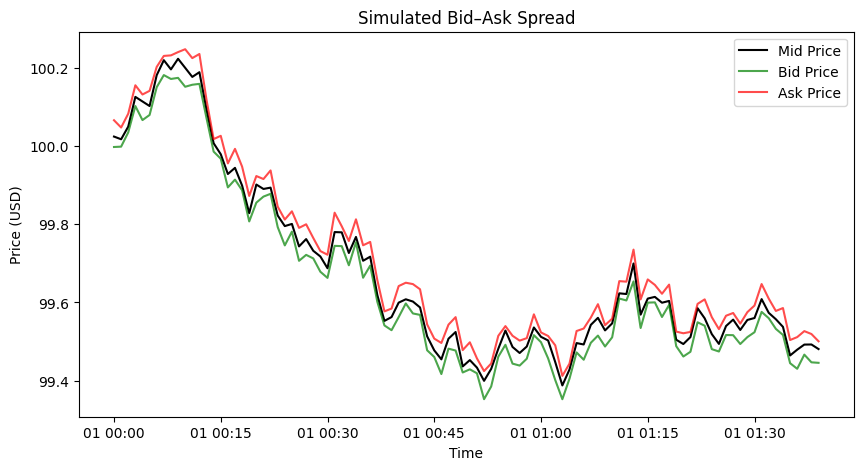

In [4]:
# -------------------------------
# 2️⃣ Plot Bid–Ask Spread
# -------------------------------

plt.figure(figsize=(10,5))
plt.plot(spread_df['Mid Price'], label='Mid Price', color='black')
plt.plot(spread_df['Bid Price'], label='Bid Price', color='green', alpha=0.7)
plt.plot(spread_df['Ask Price'], label='Ask Price', color='red', alpha=0.7)
plt.title("Simulated Bid–Ask Spread")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

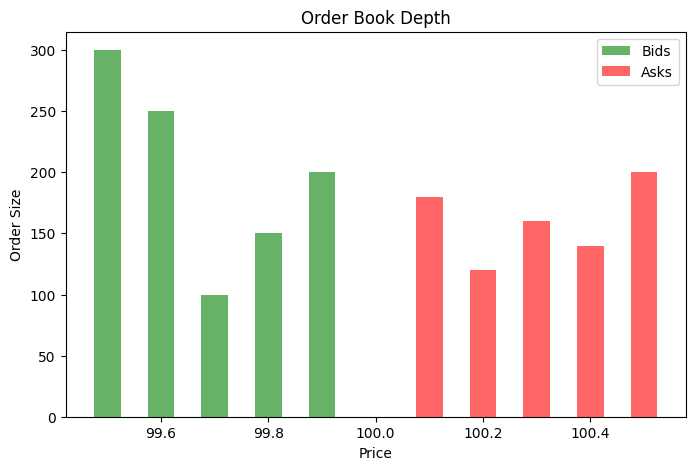

In [5]:
# -------------------------------
# 3️⃣ Simulate Order Book Depth
# -------------------------------

depth_levels = 5
depth_data = {
    "Bid Price": [99.90, 99.80, 99.70, 99.60, 99.50],
    "Bid Size":  [200, 150, 100, 250, 300],
    "Ask Price": [100.10, 100.20, 100.30, 100.40, 100.50],
    "Ask Size":  [180, 120, 160, 140, 200]
}

order_book_df = pd.DataFrame(depth_data)

# Plot order book depth
plt.figure(figsize=(8,5))
plt.bar(order_book_df['Bid Price'], order_book_df['Bid Size'], width=0.05, color='green', alpha=0.6, label='Bids')
plt.bar(order_book_df['Ask Price'], order_book_df['Ask Size'], width=0.05, color='red', alpha=0.6, label='Asks')
plt.xlabel("Price")
plt.ylabel("Order Size")
plt.title("Order Book Depth")
plt.legend()
plt.show()


In [6]:
# -------------------------------
# 4️⃣ Slippage Calculation Example
# -------------------------------

market_order_size = 350  # shares to buy
execution_prices = []
remaining_size = market_order_size

for price, size in zip(order_book_df["Ask Price"], order_book_df["Ask Size"]):
    if remaining_size <= 0:
        break
    trade_size = min(size, remaining_size)
    execution_prices.extend([price] * trade_size)
    remaining_size -= trade_size

avg_exec_price = np.mean(execution_prices)
mid_price_now = 100.00
slippage = avg_exec_price - mid_price_now

print(f"Average Execution Price: {avg_exec_price:.2f}")
print(f"Slippage: {slippage:.4f} USD per share")


Average Execution Price: 100.16
Slippage: 0.1629 USD per share


Daily VWAP: 100.03


C:\Users\lenovo\AppData\Local\Temp\ipykernel_15304\1612341008.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  minutes = pd.date_range("2024-01-01 09:30", periods=390, freq="T")


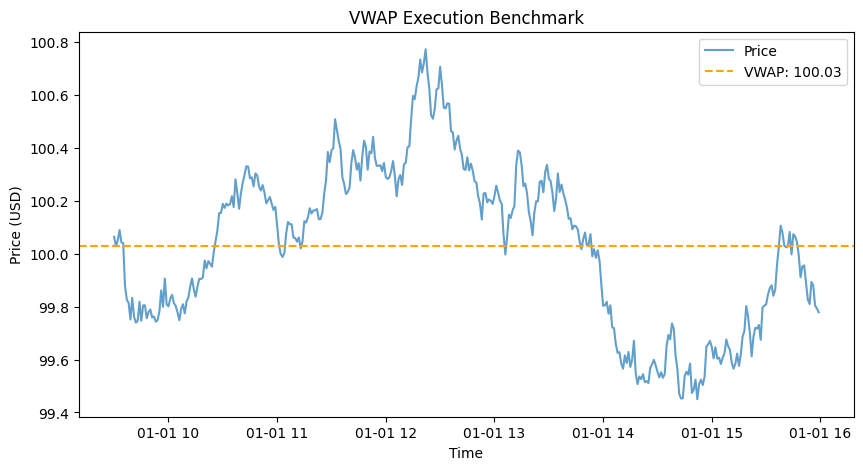

In [7]:
# -------------------------------
# 5️⃣ VWAP Execution Simulation
# -------------------------------

# Simulate 1-day price & volume data (minute-by-minute)
minutes = pd.date_range("2024-01-01 09:30", periods=390, freq="T")
prices = 100 + np.cumsum(np.random.normal(0, 0.05, size=len(minutes)))
volumes = np.random.randint(100, 1000, size=len(minutes))

vwap_df = pd.DataFrame({"Price": prices, "Volume": volumes}, index=minutes)

# VWAP calculation
vwap_df["PV"] = vwap_df["Price"] * vwap_df["Volume"]
daily_vwap = vwap_df["PV"].sum() / vwap_df["Volume"].sum()

print(f"Daily VWAP: {daily_vwap:.2f}")

# Plot VWAP vs Price
plt.figure(figsize=(10,5))
plt.plot(vwap_df.index, vwap_df["Price"], label="Price", alpha=0.7)
plt.axhline(y=daily_vwap, color='orange', linestyle='--', label=f"VWAP: {daily_vwap:.2f}")
plt.title("VWAP Execution Benchmark")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()